In [1]:
from IPython.display import Image

In [2]:
import os
os.environ['TOKENIZERS_PARALLELISM'] = 'true'
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

In [3]:
from ultralytics import YOLO, settings
settings.update({'datasets_dir': os.path.abspath(os.path.join('..', 'data'))})

import sys
import importlib
importlib.reload(sys.modules['ultralytics'])
from ultralytics import YOLO

In [4]:
model = YOLO("yolo11n-seg.pt") # pre-trained on COCO
model.info()

YOLO11n-seg summary: 203 layers, 2,876,848 parameters, 0 gradients, 10.5 GFLOPs


(203, 2876848, 0, 10.5294976)

In [5]:
# model = YOLO('../data/augmented_seg/runs/no_perspective/weights/last.pt')
results = model.train(
    data="../data/augmented_seg/data.yaml",
    project='../data/augmented_seg/runs', name='no_perspective', save_dir='',
    device="mps",
    # resume=True,
    epochs=100,
    hsv_h=0.015, # hue, good for outdoor scenarious where lighting conditions change dramatically
    hsv_s=0.7, # saturation, good for varied weather conditions and camera settings
    hsv_v=0.4, # brighness, good for lighting conditions
    degrees=0.0, # rotation, already handled separately
    translate=0.1, # translation, already handled separately but we add some more to not make the model overfit 
    scale=0.5, # scale, already handled separately but we add some more to not make the model overfit
    shear=10.0, # shear, good for handling slight tilts/changes in perspective
    perspective=0.001, # perspective, good for handling perspective distortion
    flipud=0.0, # flip up down
    fliplr=0.5, # flip left right
    bgr=0.1, # BGR channel swap, robustness to camera settings
    mosaic=1.0, # mosaic augmentation, helps generalize to different sizes, partial occlusions, contexts, and multiple objects
    mixup=0.0, # mixup augmentation, helps reduce overfitting by blending images
    copy_paste=0.2, # copy paste objects between images
    copy_paste_mode='mixup',
    erasing=0.0, # only for classification
    auto_augment=None, # only for classification
)

New https://pypi.org/project/ultralytics/8.3.111 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.109 🚀 Python-3.10.12 torch-2.6.0 MPS (Apple M4 Max)
engine/trainer: task=segment, mode=train, model=../data/augmented_seg/runs/no_perspective/weights/last.pt, data=../data/augmented_seg/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=0, project=../data/augmented_seg/runs, name=no_perspective, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=../data/augmented_seg/runs/no_perspective/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, a

python(75287) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(75315) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(75316) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

python(75417) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
train: Scanning /Users/alex/Desktop/CS/ML/PCB-Detection/data/augmented_seg/labels/train.cache... 1060 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1060/1060 [00:00<?, ?it/s]
python(75418) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/alex/Desktop/CS/ML/PCB-Detection/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/Users/alex/Desktop/CS/ML/PCB-Detection/venv/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /Users/alex/Desktop/CS/ML/PCB-Detection/data/augmented_seg/labels/val.cache... 270 images, 0 backgrounds, 0 corrupt: 100%|██████████| 270/270 [00:00<?, ?it/s]


Plotting labels to ../data/augmented_seg/runs/no_perspective/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Resuming training ../data/augmented_seg/runs/no_perspective/weights/last.pt from epoch 96 to 100 total epochs
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to ../data/augmented_seg/runs/no_perspective
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.39G     0.1954     0.2258     0.1636     0.8253          4        640: 100%|██████████| 67/67 [02:47<00:00,  2.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:15<00:00,  8.37s/it]

                   all        270        681       0.99      0.396      0.482      0.476       0.99      0.396      0.482      0.475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.57G     0.1821     0.2205     0.1567     0.8252          6        640: 100%|██████████| 67/67 [02:56<00:00,  2.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:44<00:00,  4.92s/it]

                   all        270        681      0.995      0.396      0.501      0.496      0.995      0.396      0.501      0.494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.53G      0.184     0.2271     0.1543     0.8248          4        640: 100%|██████████| 67/67 [02:54<00:00,  2.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:41<00:00,  4.59s/it]

                   all        270        681      0.996      0.396      0.509      0.503      0.996      0.396      0.509      0.503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.51G     0.1838     0.2195     0.1559     0.8263          4        640: 100%|██████████| 67/67 [05:52<00:00,  5.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|██████▋   | 6/9 [00:27<00:13,  4.63s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:38<00:00, 10.91s/it]

                   all        270        681      0.999      0.366      0.485       0.48      0.999      0.366      0.485      0.479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.51G     0.1843     0.2195     0.1592     0.8247          5        640: 100%|██████████| 67/67 [02:54<00:00,  2.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:40<00:00,  4.51s/it]

                   all        270        681      0.995      0.396      0.516      0.511      0.995      0.396      0.516      0.509



5 epochs completed in 0.375 hours.
Optimizer stripped from ../data/augmented_seg/runs/no_perspective/weights/last.pt, 6.0MB
Optimizer stripped from ../data/augmented_seg/runs/no_perspective/weights/best.pt, 6.0MB

Validating ../data/augmented_seg/runs/no_perspective/weights/best.pt...
Ultralytics 8.3.109 🚀 Python-3.10.12 torch-2.6.0 MPS (Apple M4 Max)
YOLO11n-seg summary (fused): 113 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:43<00:00,  4.85s/it]


                   all        270        681      0.995      0.396      0.516      0.511      0.995      0.396      0.516      0.508
Speed: 1.5ms preprocess, 22.7ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to ../data/augmented_seg/runs/no_perspective


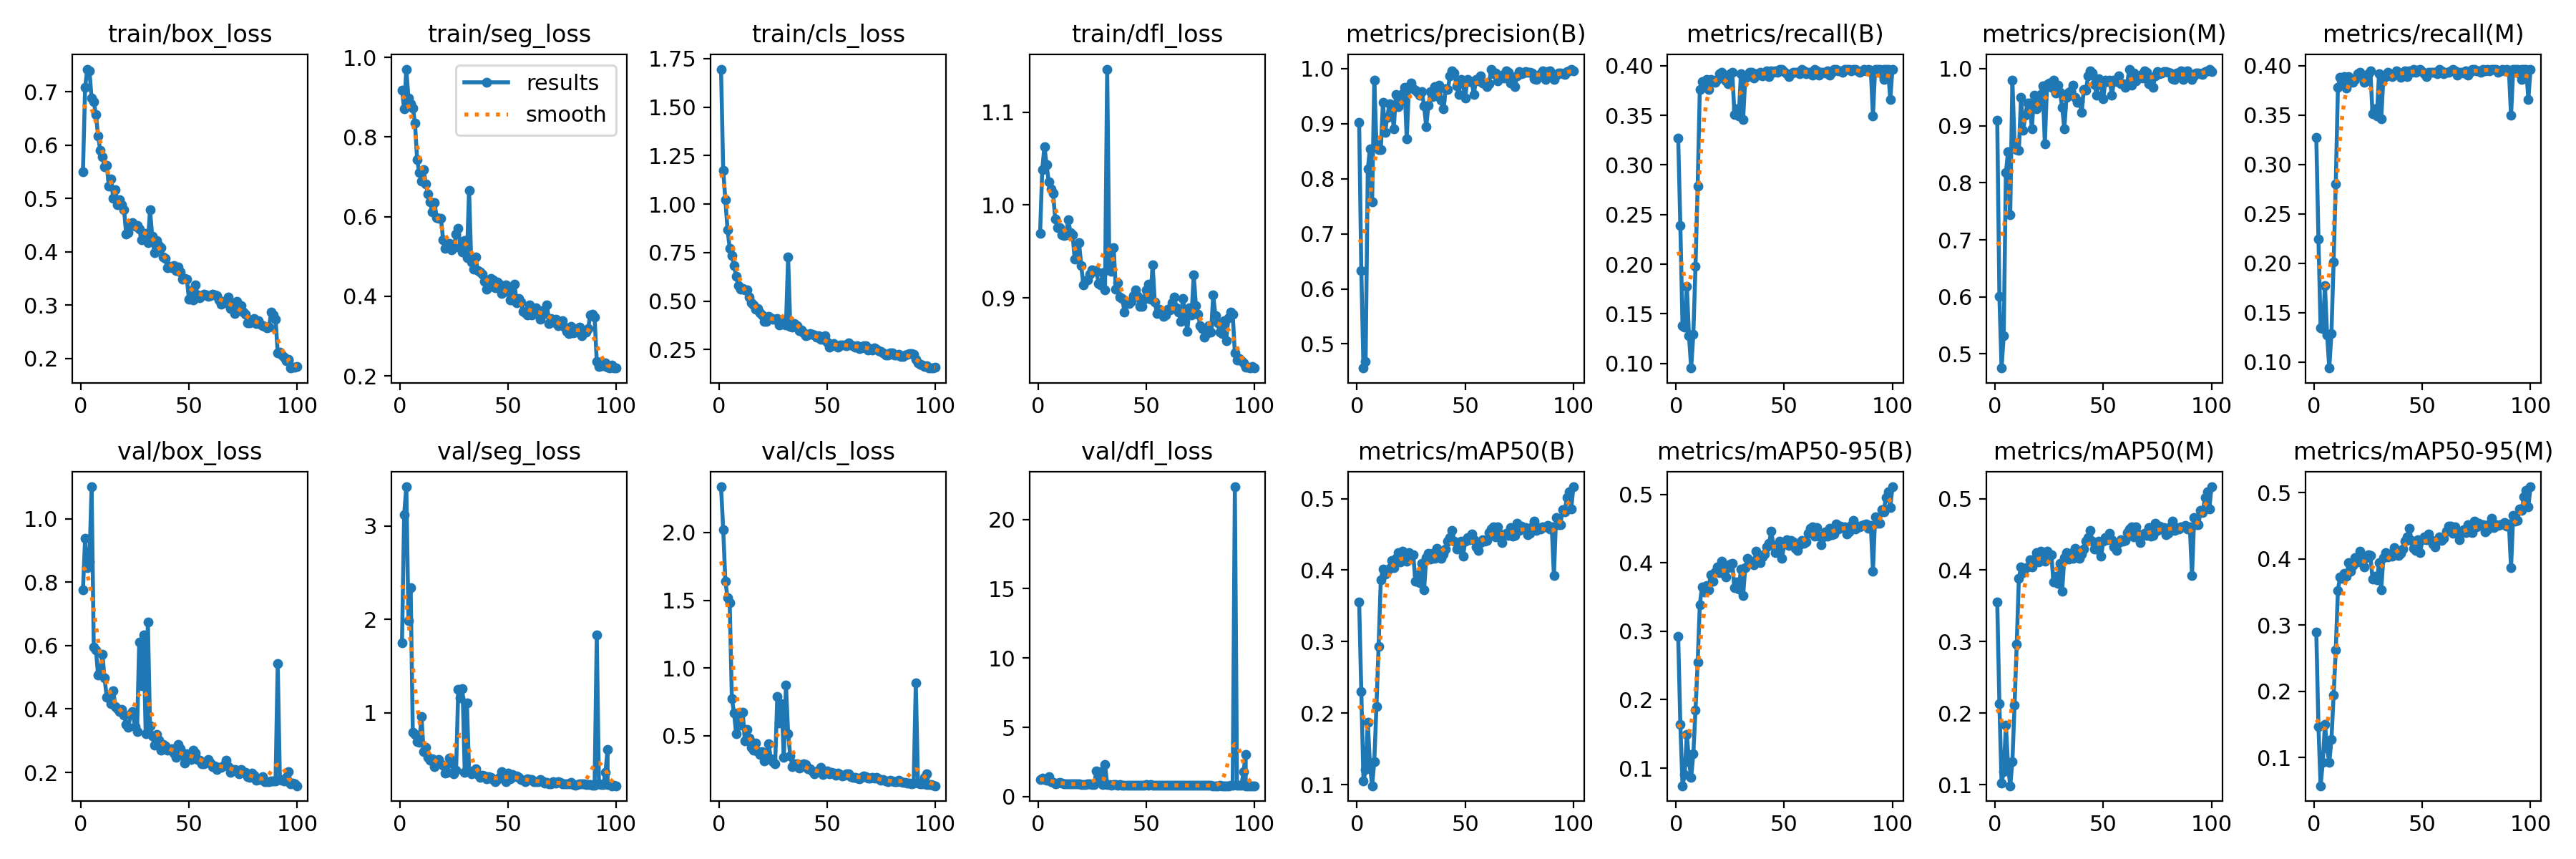

In [6]:
Image(filename='../data/augmented_seg/runs/no_perspective/results.png', width=800)

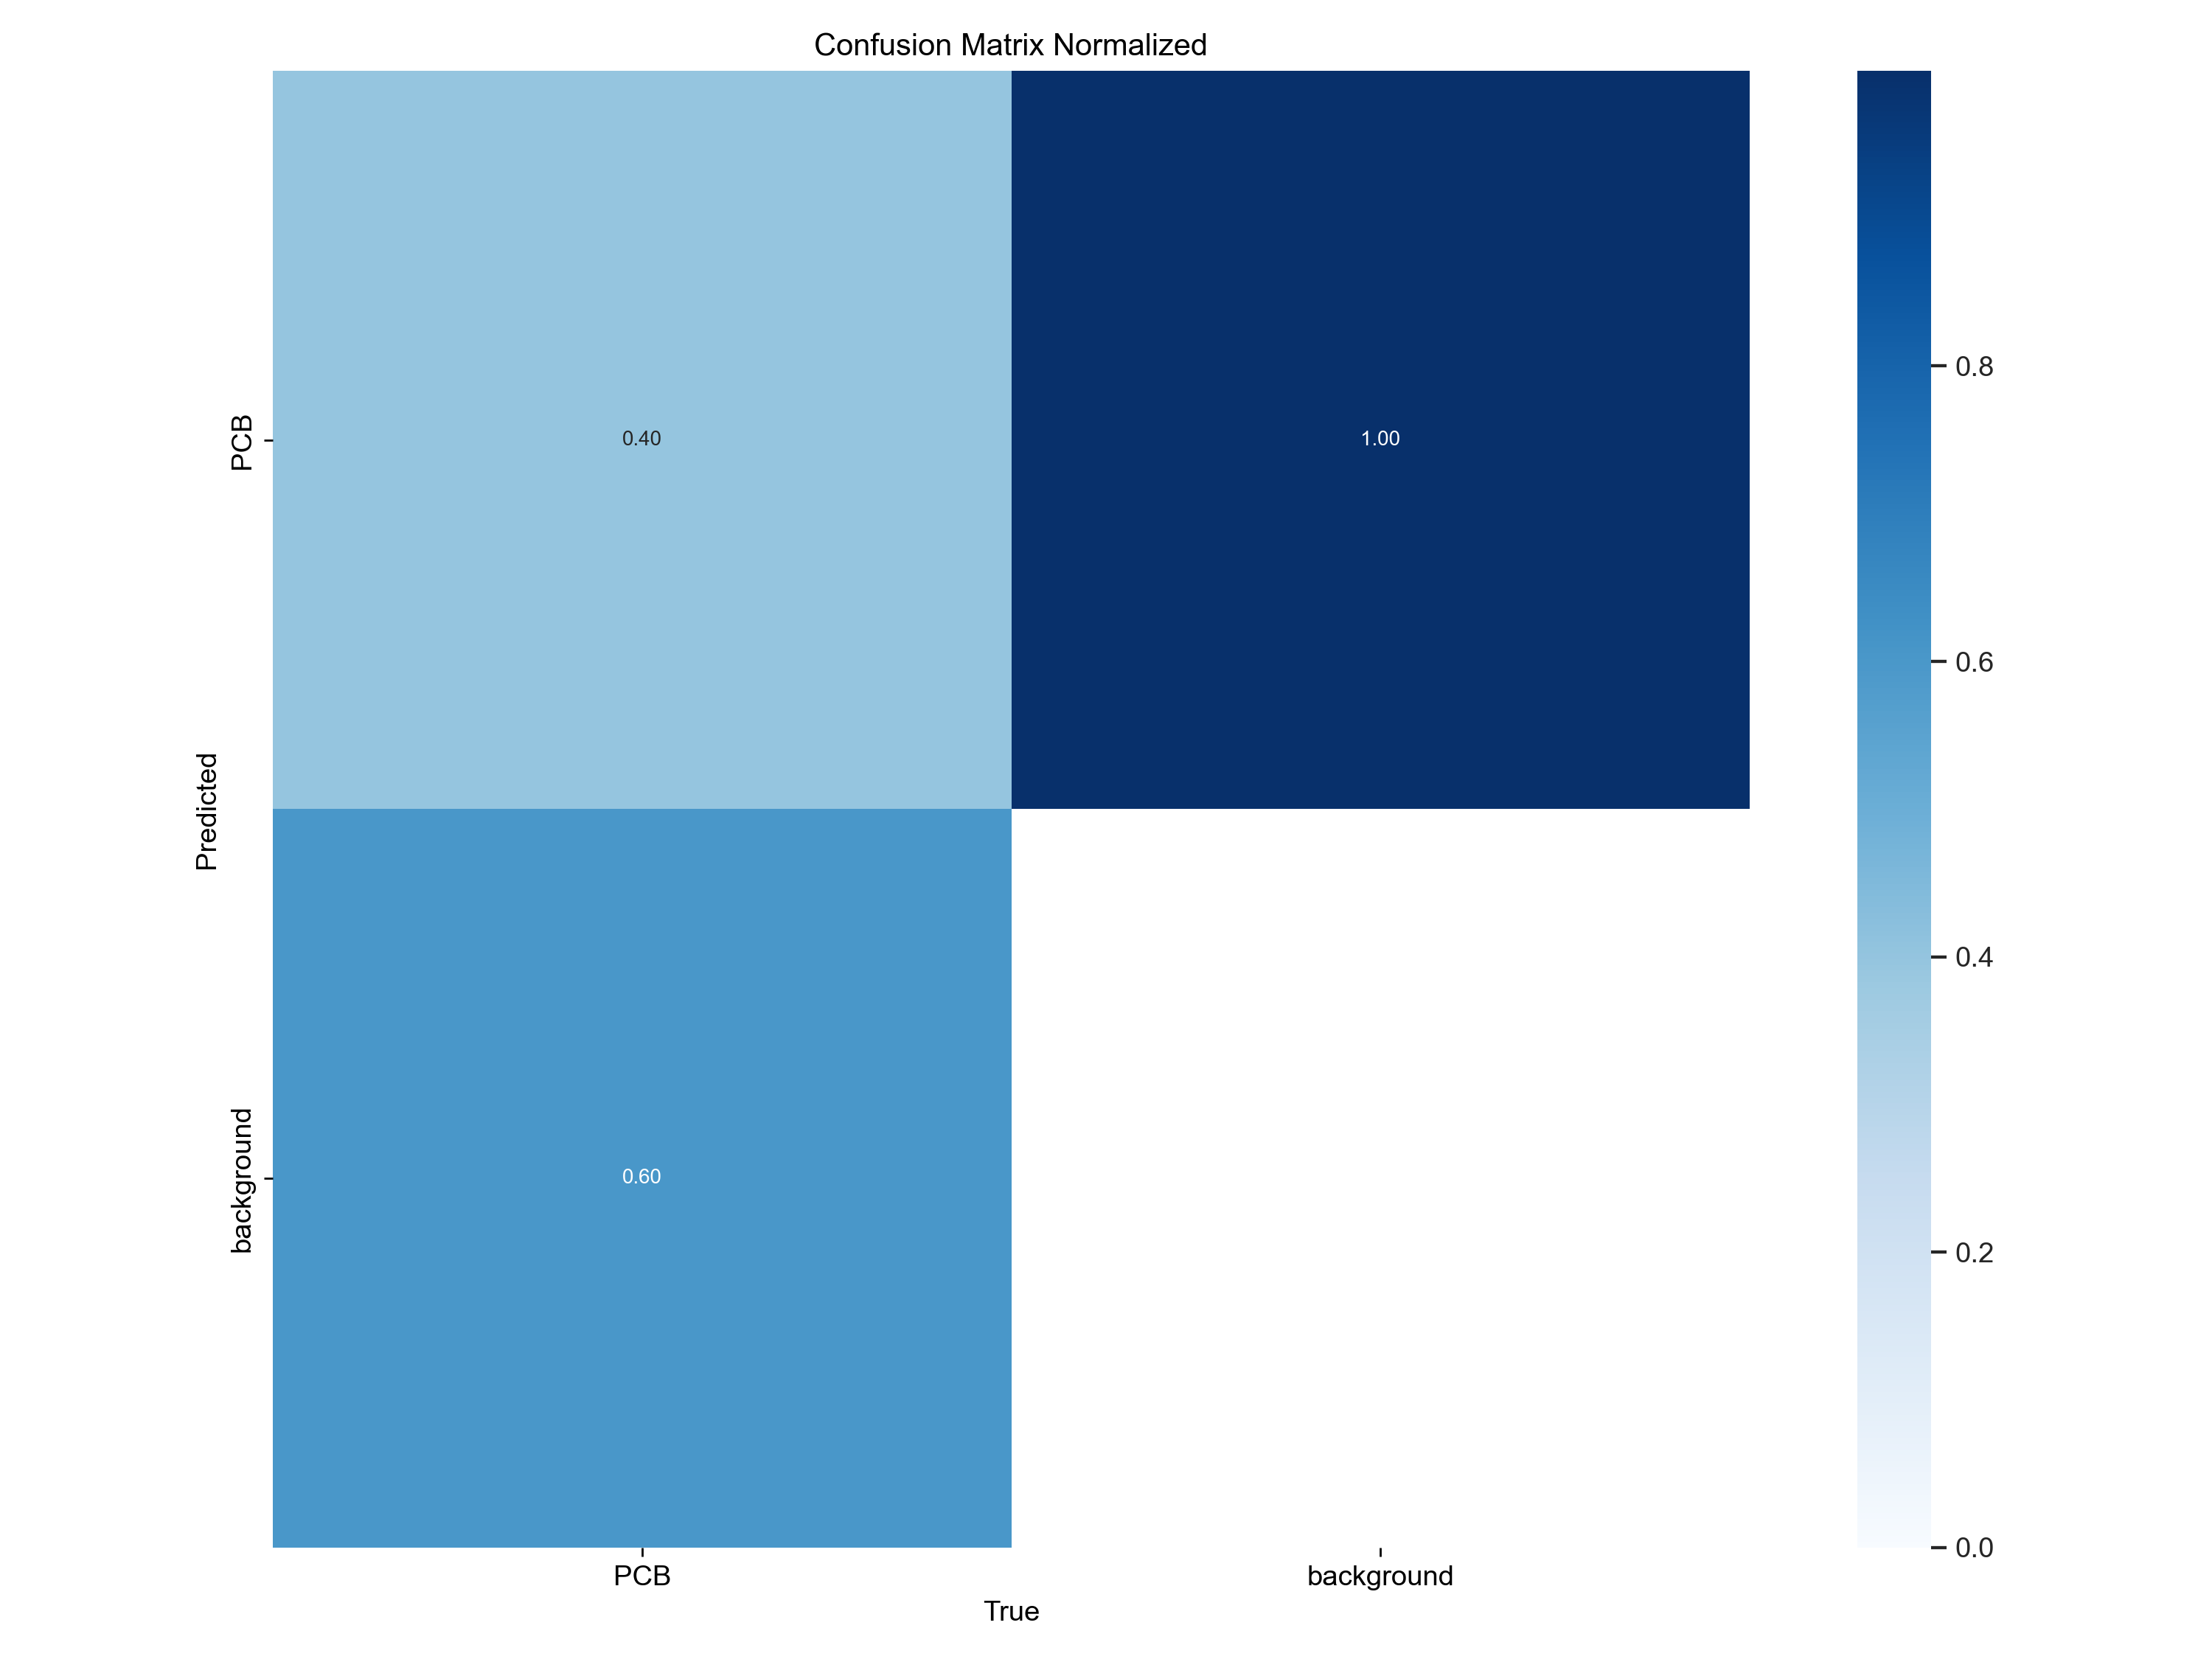

In [7]:
Image('../data/augmented_seg/runs/no_perspective/confusion_matrix_normalized.png', width=600)

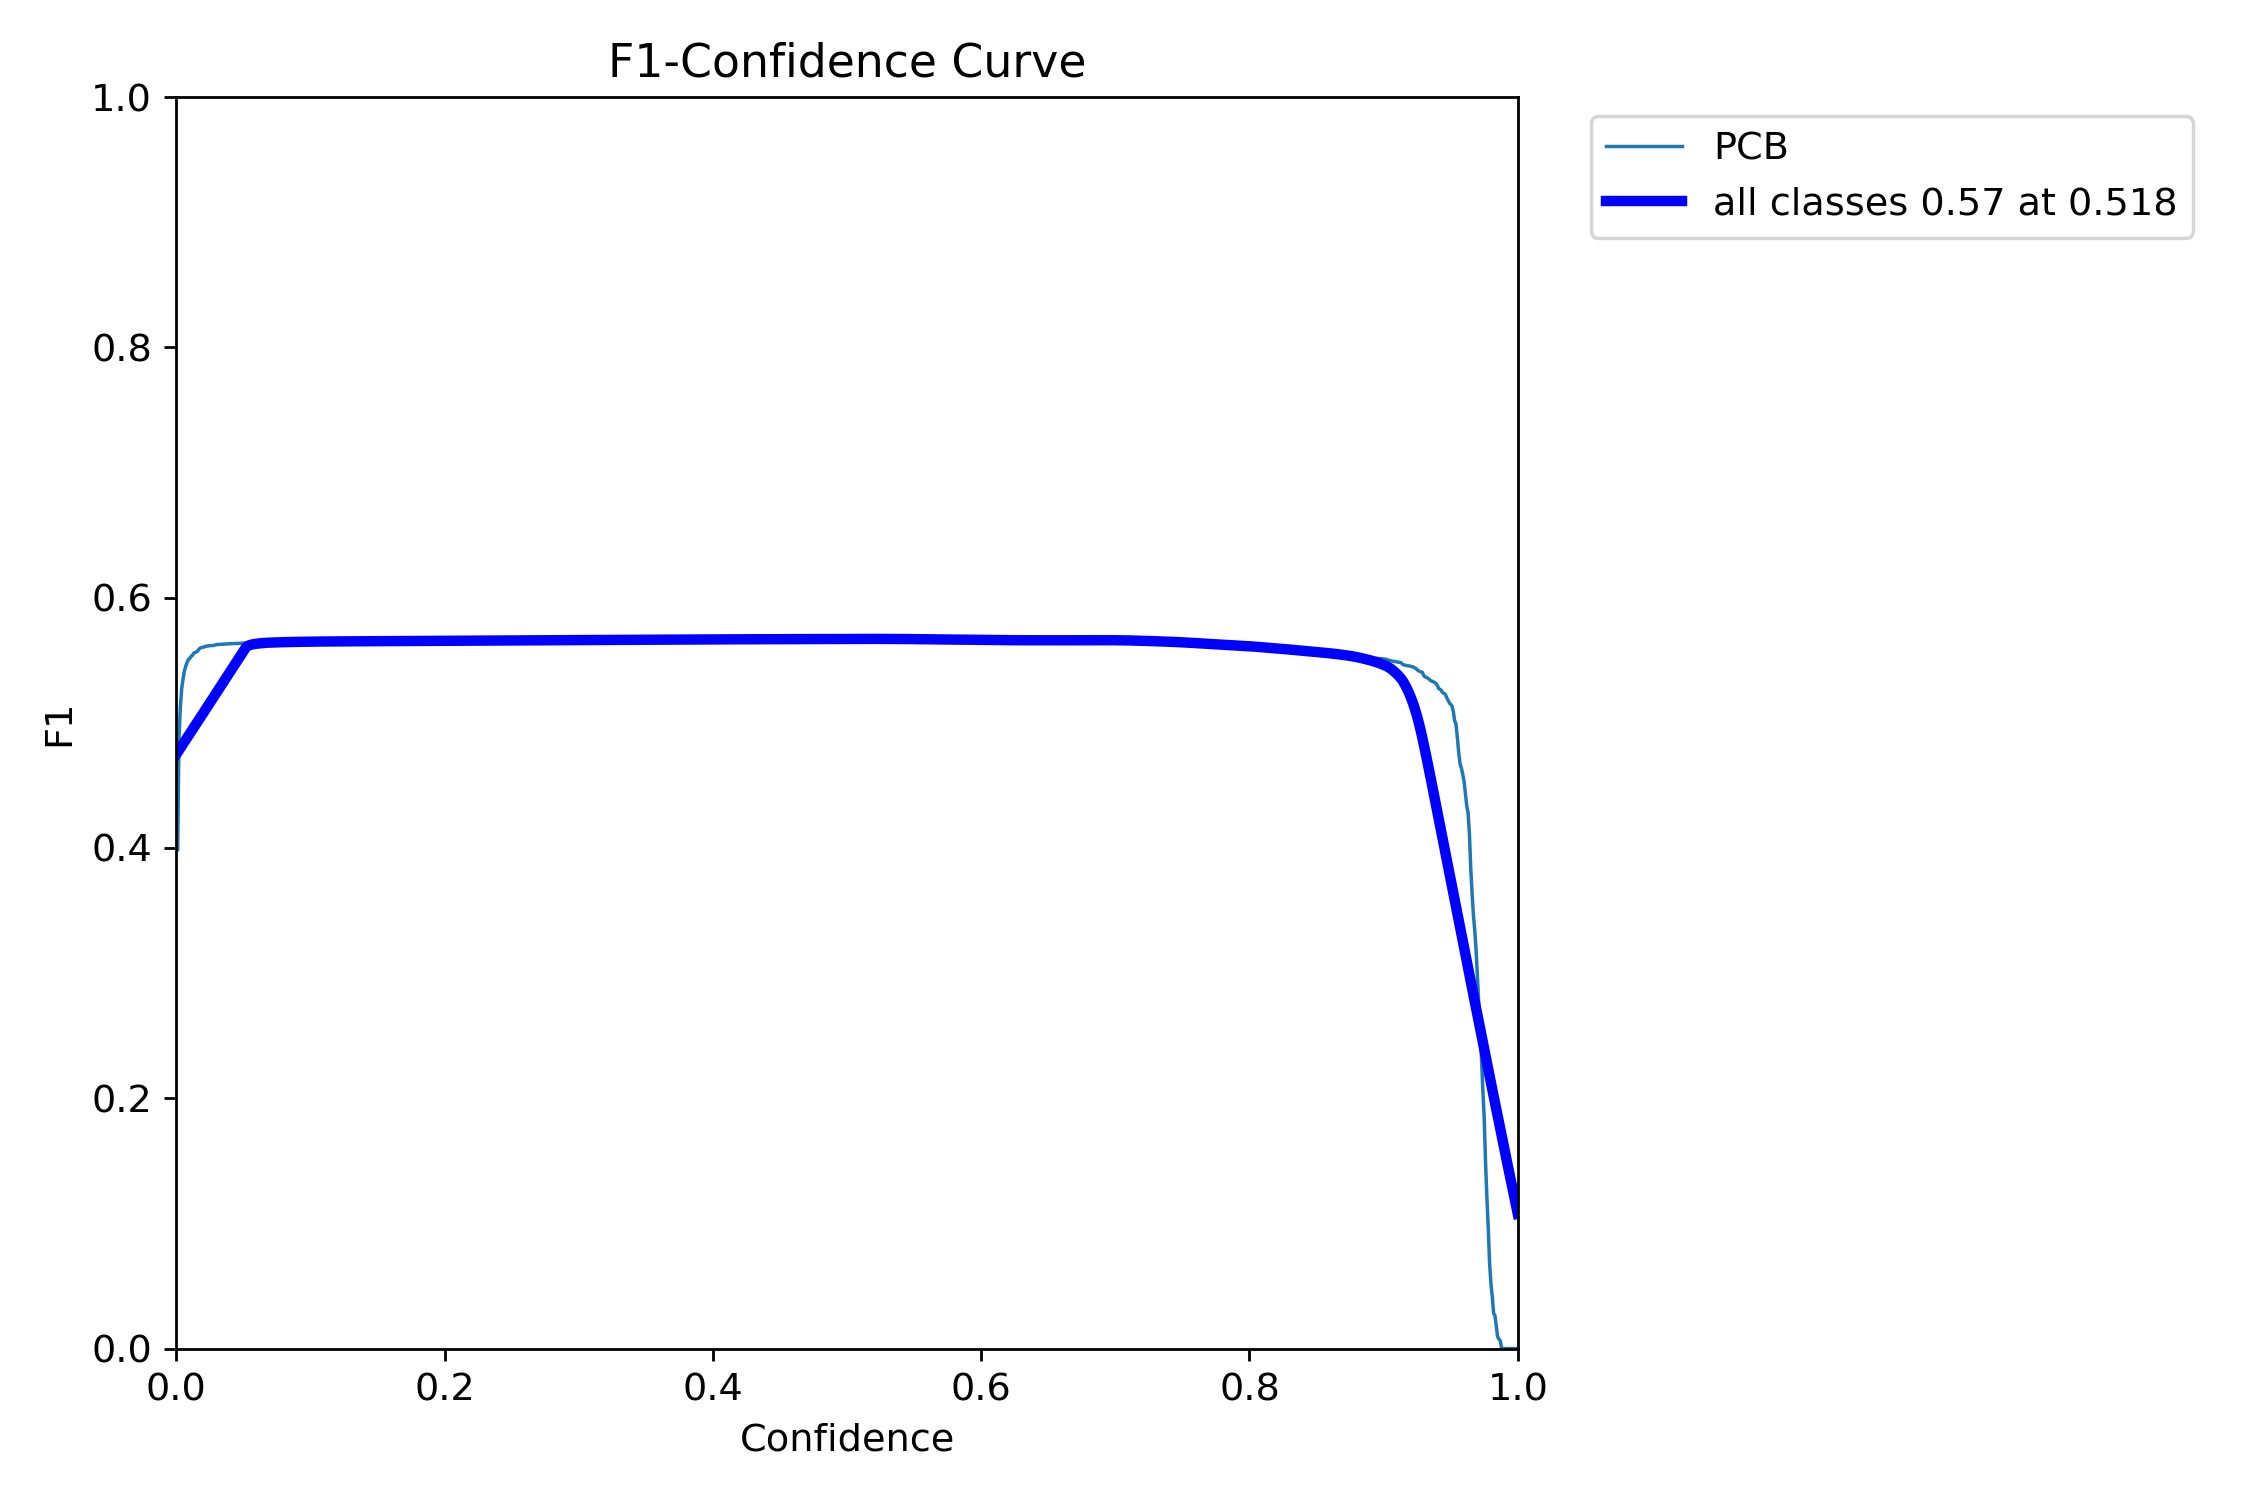

In [10]:
Image('../data/augmented_seg/runs/no_perspective/MaskF1_curve.png', width=600)

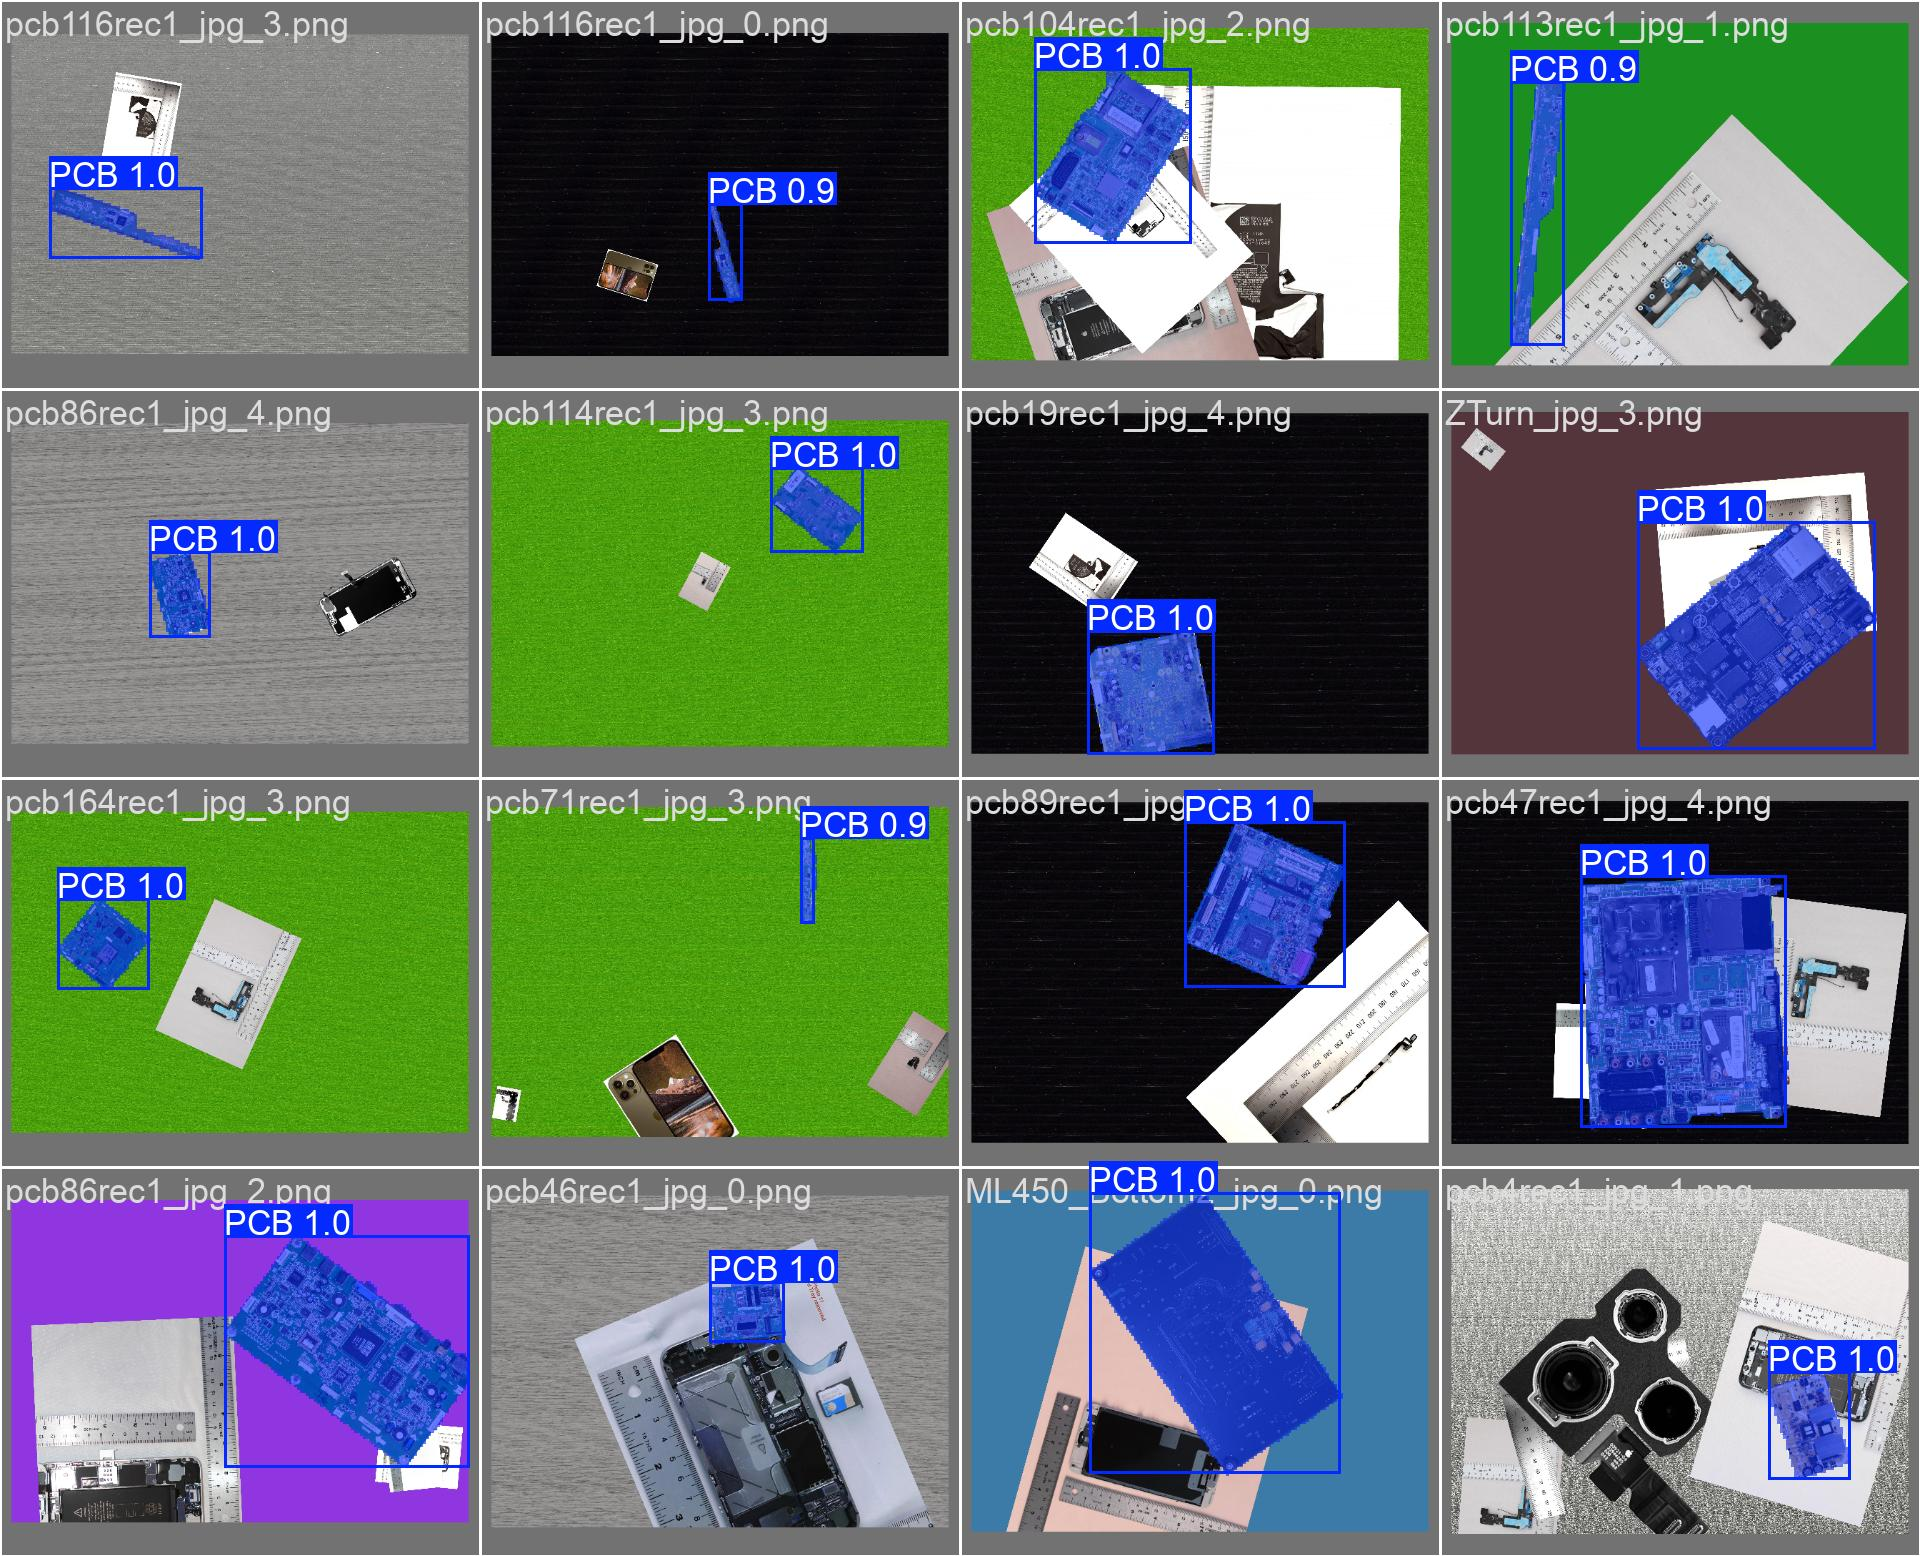

In [12]:
Image('../data/augmented_seg/runs/no_perspective/val_batch1_pred.jpg', width=600)

In [13]:
model = YOLO('../data/augmented_seg/runs/no_perspective/weights/best.pt')
results = model.val(split='test', device='mps')

Ultralytics 8.3.109 🚀 Python-3.10.12 torch-2.6.0 MPS (Apple M4 Max)
YOLO11n-seg summary (fused): 113 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


val: Scanning /Users/alex/Desktop/CS/ML/PCB-Detection/data/augmented_seg/labels/test... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<00:00, 338.40it/s]

val: New cache created: /Users/alex/Desktop/CS/ML/PCB-Detection/data/augmented_seg/labels/test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.49s/it]


                   all         15         15      0.997          1      0.995      0.945      0.997          1      0.995      0.956
Speed: 1.8ms preprocess, 80.0ms inference, 0.0ms loss, 7.2ms postprocess per image
Results saved to runs/segment/val


In [14]:
results = model.val(split='val', device='mps')

Ultralytics 8.3.109 🚀 Python-3.10.12 torch-2.6.0 MPS (Apple M4 Max)


val: Scanning /Users/alex/Desktop/CS/ML/PCB-Detection/data/augmented_seg/labels/val.cache... 270 images, 0 backgrounds, 0 corrupt: 100%|██████████| 270/270 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:08<00:00,  4.03s/it]


                   all        270        681      0.999      0.396      0.517      0.513      0.999      0.396      0.517       0.51
Speed: 2.4ms preprocess, 93.3ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to runs/segment/val2


In [15]:
results = model.val(split='train', device='mps')

Ultralytics 8.3.109 🚀 Python-3.10.12 torch-2.6.0 MPS (Apple M4 Max)


val: Scanning /Users/alex/Desktop/CS/ML/PCB-Detection/data/augmented_seg/labels/train.cache... 1060 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1060/1060 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [04:53<00:00,  4.38s/it]


                   all       1060       4561          1      0.232      0.394      0.393          1      0.232      0.394      0.391
Speed: 2.0ms preprocess, 11.6ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/segment/val3
